In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from src.experiment import Experiment
from src.argparser import read_json

### Run experiment with just one image/batch

In [2]:
# Read parameters.
name = "DLG"
params = read_json('params/'+name+'.json')

torch.manual_seed(1234)
# Run experiment.

exp = Experiment(params)
exp.train()
#print(exp.losses)

Running on cpu
Files already downloaded and verified
0 231.4378051758
40 0.0043273638
80 0.0002172699
120 0.0000431787
160 0.0000177647


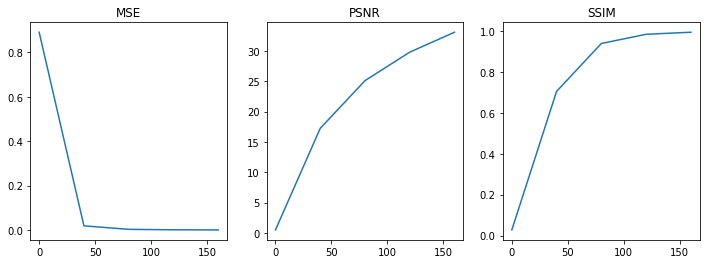

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].plot(exp.iters, exp.losses['mse'][0])
ax[0].set_title('MSE')
ax[1].plot(exp.iters, exp.losses['psnr'][0])
ax[1].set_title('PSNR')
ax[2].plot(exp.iters, exp.losses['ssim'][0])
ax[2].set_title('SSIM')
plt.show()

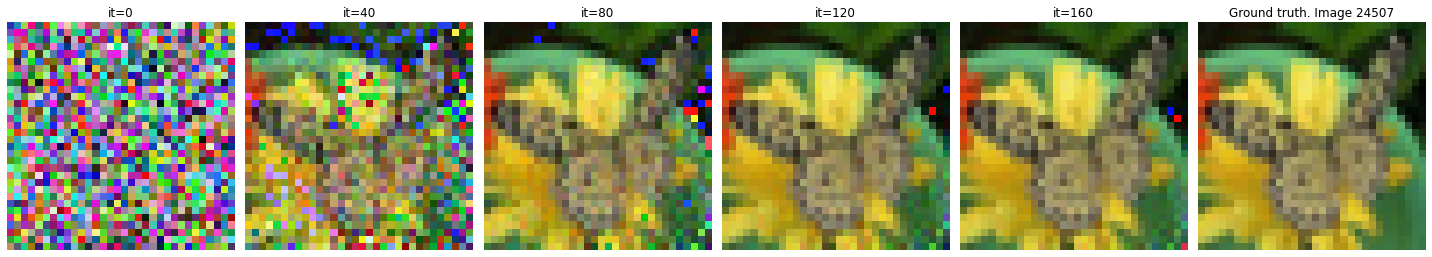

In [4]:
exp.make_reconstruction_plots(figsize=(20,10))

### Run experiment on multiple images/batches to get more descriptive result

In [5]:
exp = Experiment(params)

Running on cpu
Files already downloaded and verified


In [6]:
exp.run_multiple()

0 131.3039855957
40 0.0010322601
80 0.0000867088
120 0.0000225724
160 0.0000132721
0 40.6516227722
40 0.0004277564
80 0.0000324880
120 0.0000073102
160 0.0000039133
0 139.9747772217
40 0.0053791637
80 0.0002865977
120 0.0000408891
160 0.0000125327
0 33.1468086243
40 0.0007188744
80 0.0000438080
120 0.0000091541
160 0.0000036420
0 349.1999206543
40 0.0019246117
80 0.0001418240
120 0.0000275708
160 0.0000134218


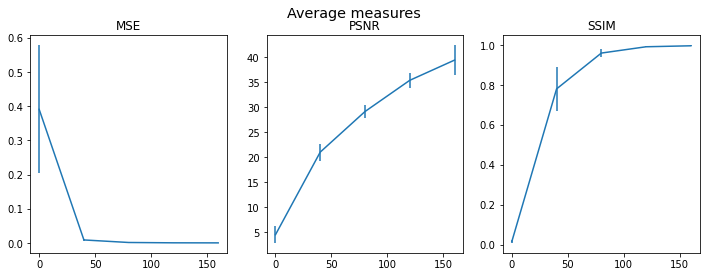

In [7]:
mses = np.mean(exp.losses['mse'], axis=0)
mse_stds = np.std(exp.losses['mse'], axis=0)
psnrs = np.mean(exp.losses['psnr'], axis=0)
psnr_stds = np.std(exp.losses['psnr'], axis=0)
ssims = np.mean(exp.losses['ssim'], axis=0)
ssim_stds = np.std(exp.losses['ssim'], axis=0)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Average measures', fontsize='x-large')
ax[0].errorbar(exp.iters, mses, mse_stds)
ax[0].set_title('MSE')
ax[1].errorbar(exp.iters, psnrs, psnr_stds)
ax[1].set_title('PSNR')
ax[2].errorbar(exp.iters, ssims, ssim_stds)
ax[2].set_title('SSIM')
plt.show()

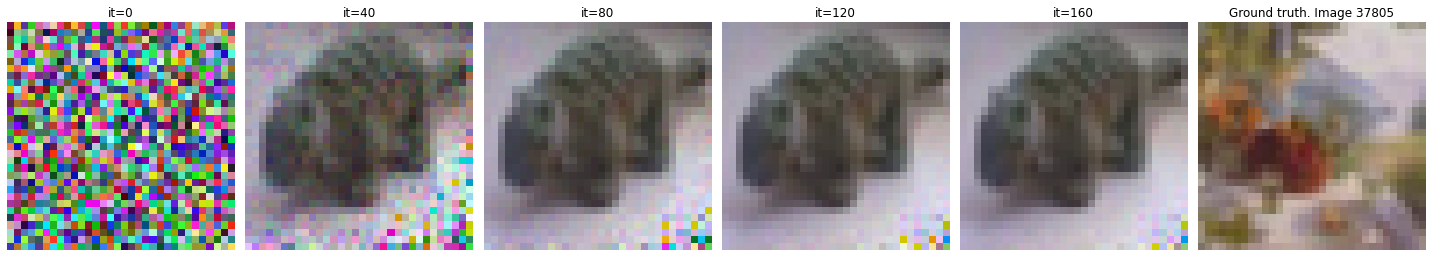

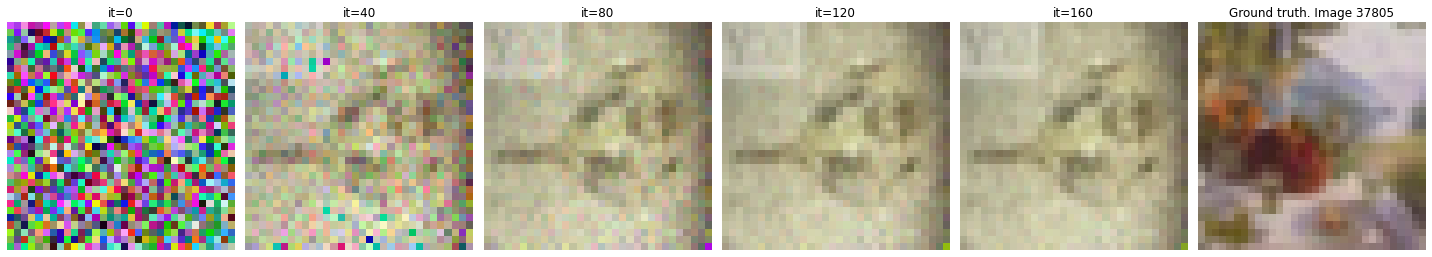

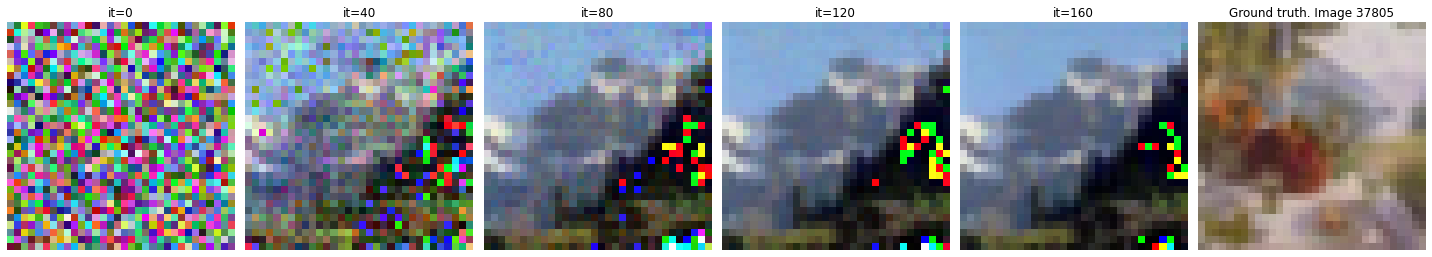

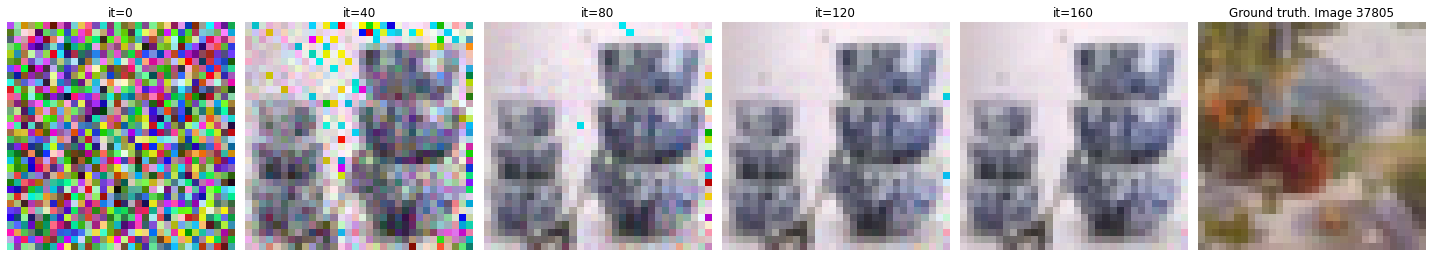

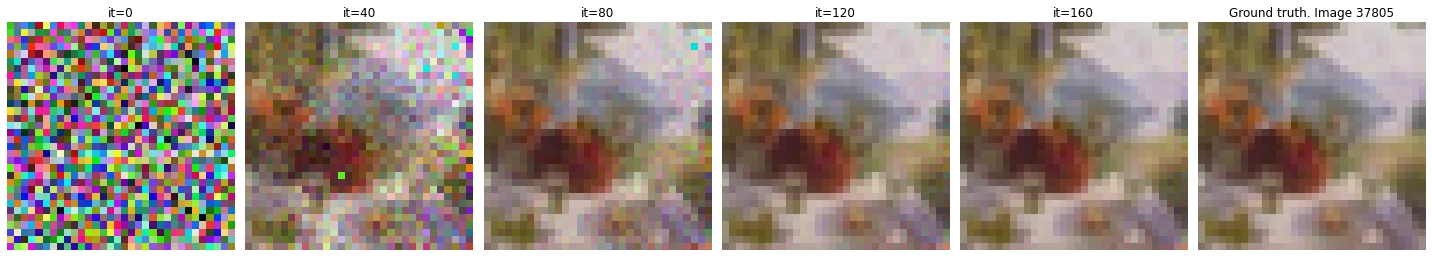

In [10]:
for t_ids in range(exp.n_repeats):
    exp.make_reconstruction_plots(train_id=t_ids, figsize=(20,10))